In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('universal_tagset')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

Chargement du contenu d'une page web

In [2]:
import urllib.request
response =  urllib.request.urlopen('https://www.journaldunet.com/economie/automobile/1398147-tesla-presentation-cybertruck/')
html = response.read()
print(html)

b'\n<!--Akamai-ESI:PAGE:setreftime=1574482187/--><!doctype html>\n<!--[if lt IE 7 ]> <html lang="fr" class="no-js ie6 lt-ie9 lt-ie8 lt-ie7 oldie"> <![endif]-->\n<!--[if IE 7 ]>    <html lang="fr" class="no-js ie7 lt-ie9 lt-ie8 oldie"> <![endif]-->\n<!--[if IE 8 ]>    <html lang="fr" class="no-js ie8 lt-ie9 oldie"> <![endif]-->\n<!--[if IE 9 ]>    <html lang="fr" class="no-js ie9"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html lang="fr" class="no-js"> <!--<![endif]-->\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# journaldunet: http://ogp.me/ns/fb/journaldunet#">\n    <script type=\'text/javascript\'>var _sf_startpt=(new Date()).getTime()</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n            <meta name="referrer" content="always" />\n            <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <title>Tesla&nbsp;: Musk d&eacute;voile le Cybertruck, un pickup au design extrat

La première chose à faire pour que le texte soit utilisable, c'est de retirer toutes les balises HTML.

La librairie BeautifulSoup permet d'extraire du texte d'une page HTML

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html.parser')
for script in soup(["script", "style"]):
    script.decompose()    # rip it out
text = soup.get_text(strip = True)
print(text)

Tesla : Musk dévoile le Cybertruck, un pickup au design extraterrestreFintechMartechCloudMobilitésSEORetailIAAdtechSmart cityEventsLivres blancsFintechMartechCloudMobilitésSEORetailIAAdtechSmart cityEventsLivres blancsBig dataIoTe-RHPublishersAnalyticsEmploiTechManagementMédiaPatrimoinePlusMenuMoteur de rechercheRechercheS'inscrireConnexionEditer mes informationsGérer mes chroniquesDéconnexionAccueilBusinessAutomobileTesla : Musk dévoile le Cybertruck, un pickup au design extraterrestreJamal El HassaniJDNMis à jour le22/11/19 11:53TwitterLinkedInFacebookViadeoEmailTESLA - Acier inoxydable, verre blindé… Tesla a multiplié les superlatifs pour vanter la résistance de son nouveau véhicule électrique, qui devrait entrer en production fin 2021.SommaireTesla FrancePrix TeslaTesla Model 3Tesla Model STesla Model XTesla RoadsterTesla Model YOccasion TeslaMode AutopilotBatteries TeslaTesla en Bourse[Article mis à jour le 22 novembre 2019 à 11h53]Tesla avait habitué ses fans à des véhicules aux 

L'étape suivante est la tokenization. La transformation du texte en un tableau de tokens.

In [4]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens)

['Tesla', ':', 'Musk', 'dévoile', 'le', 'Cybertruck', ',', 'un', 'pickup', 'au', 'design', 'extraterrestreFintechMartechCloudMobilitésSEORetailIAAdtechSmart', 'cityEventsLivres', 'blancsFintechMartechCloudMobilitésSEORetailIAAdtechSmart', 'cityEventsLivres', 'blancsBig', 'dataIoTe-RHPublishersAnalyticsEmploiTechManagementMédiaPatrimoinePlusMenuMoteur', 'de', "rechercheRechercheS'inscrireConnexionEditer", 'mes', 'informationsGérer', 'mes', 'chroniquesDéconnexionAccueilBusinessAutomobileTesla', ':', 'Musk', 'dévoile', 'le', 'Cybertruck', ',', 'un', 'pickup', 'au', 'design', 'extraterrestreJamal', 'El', 'HassaniJDNMis', 'à', 'jour', 'le22/11/19', '11:53TwitterLinkedInFacebookViadeoEmailTESLA', '-', 'Acier', 'inoxydable', ',', 'verre', 'blindé…', 'Tesla', 'a', 'multiplié', 'les', 'superlatifs', 'pour', 'vanter', 'la', 'résistance', 'de', 'son', 'nouveau', 'véhicule', 'électrique', ',', 'qui', 'devrait', 'entrer', 'en', 'production', 'fin', '2021.SommaireTesla', 'FrancePrix', 'TeslaTesla', 

On constate beacoup de "bruit" dans ce tableau. Une étape de nettoyage des tokens est nécessaire.

Pour cela une liste des stopwords de la langue française est chargée. Tous les tokens appartenant à cette liste sont supprimés. On retire également tout ce qui n'est pas alphabétique (ponctuation, ...)

In [5]:
from nltk.corpus import stopwords
my_stopwords = [w for w in open("fr-stopwords.txt", encoding='utf-8').read().split("\n")]
clean_tokens = tokens[:]
for token in tokens:
    if token.lower() in my_stopwords or not token.isalpha():  
        clean_tokens.remove(token)
        
clean_tokens

['Tesla',
 'Musk',
 'dévoile',
 'Cybertruck',
 'pickup',
 'design',
 'extraterrestreFintechMartechCloudMobilitésSEORetailIAAdtechSmart',
 'cityEventsLivres',
 'blancsFintechMartechCloudMobilitésSEORetailIAAdtechSmart',
 'cityEventsLivres',
 'blancsBig',
 'informationsGérer',
 'chroniquesDéconnexionAccueilBusinessAutomobileTesla',
 'Musk',
 'dévoile',
 'Cybertruck',
 'pickup',
 'design',
 'extraterrestreJamal',
 'El',
 'HassaniJDNMis',
 'jour',
 'Acier',
 'inoxydable',
 'verre',
 'Tesla',
 'multiplié',
 'superlatifs',
 'vanter',
 'résistance',
 'véhicule',
 'électrique',
 'entrer',
 'production',
 'fin',
 'FrancePrix',
 'TeslaTesla',
 'Model',
 'Model',
 'STesla',
 'Model',
 'XTesla',
 'RoadsterTesla',
 'Model',
 'YOccasion',
 'TeslaMode',
 'AutopilotBatteries',
 'TeslaTesla',
 'Bourse',
 'Article',
 'mis',
 'jour',
 'novembre',
 'Tesla',
 'habitué',
 'fans',
 'véhicules',
 'designs',
 'ambitieux',
 'constructeur',
 'auto',
 'dirigé',
 'parElon',
 'Muskest',
 'allé',
 'loin',
 'Tesla',


Il y a toujours certains termes issus de la page web qui ne sont pas nécessaires au texte. Cepandant, en calculant la fréquence d'apparition de chacun des mots, le sujet de la page devrait ressortir.

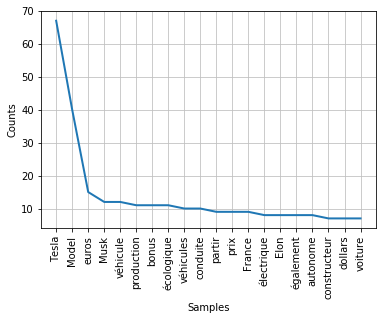

In [7]:
freq = nltk.FreqDist(clean_tokens)
freq.plot(20, cumulative=False)